### Lab1 (a)

$$L= (X_1W - y_1)^2 + (X_2W - y_2)^2 + (X_3W - y_3)^2$$

Taking the gradient:

$$\delta L(W) = 2X_1(X_1W - y_1) + 2X_2(X_2W - y_2) + 2X_3(X_3W - y_3)$$

Therefore:

$$W^{k+1} = W^k - \mu * L(W) = W^k - 0.04X^T(XW^k - y)$$

Where $X = [X_1;X_2;X_3]$ and $y = [y_1;y_2;y_3]$

### Lab1 (b)

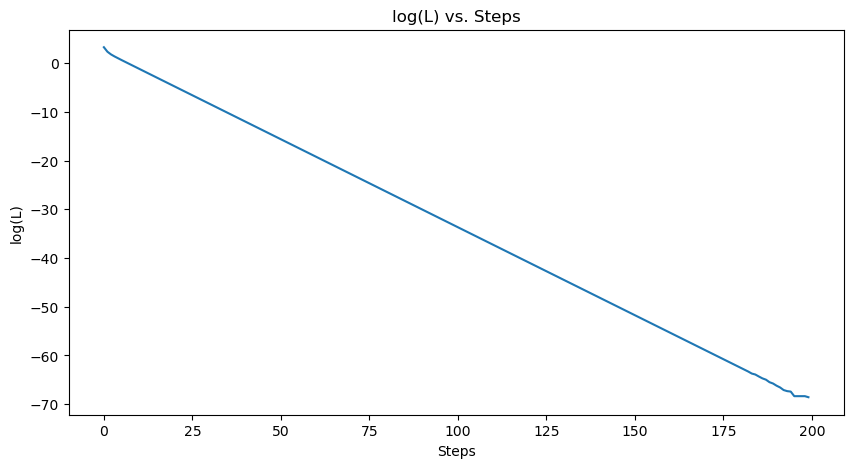

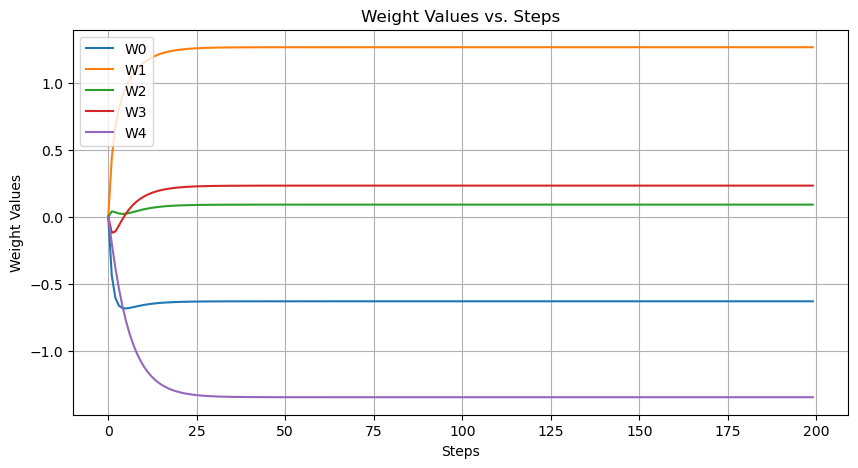

Final Weights: [-0.63143255  1.26564673  0.09040334  0.23226704 -1.34770515]
Final Loss: 1.627025617018337e-30


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.array([[-2, 2, 1, -1, -1]])
X2 = np.array([[-2, 1, -2, 0, 1]])
X3 = np.array([[1, 0, -2, 2, -1]])
y1, y2, y3 = 5, 1, 1


X = np.vstack([X1, X2, X3])
y = np.array([y1, y2, y3])

W = np.zeros((5, 1))
learning_rate = 0.02
steps = 200

loss_history = np.zeros(steps)
weight_history = np.zeros((steps, 5))

for step in range(steps):

    predictions = X @ W

    loss = np.sum((predictions - y.reshape(-1, 1))**2)
    loss_history[step] = loss

    weight_history[step] = W.flatten()
    gradient = 2 * X.T @ (predictions - y.reshape(-1, 1))
    W -= learning_rate * gradient

plt.figure(figsize=(10, 5))
plt.plot(np.log(loss_history))
plt.title('log(L) vs. Steps')
plt.xlabel('Steps')
plt.ylabel('log(L)')
plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(weight_history[:, i], label=f'W{i}')
plt.title('Weight Values vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Weight Values')
plt.legend()
plt.grid(True)
plt.show()

print('Final Weights:', W.flatten())
print('Final Loss:', loss)

Yes W converged to an optimal solution at an early stage and it is not converging to a sparse solution.

### Lab1 (c)

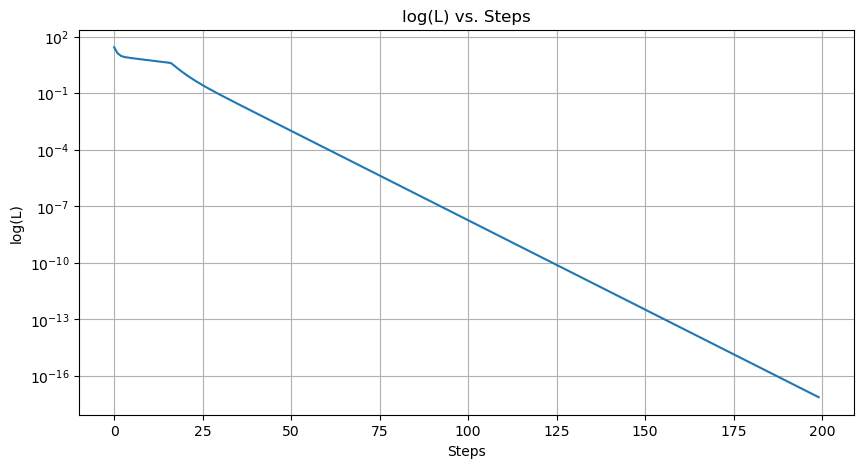

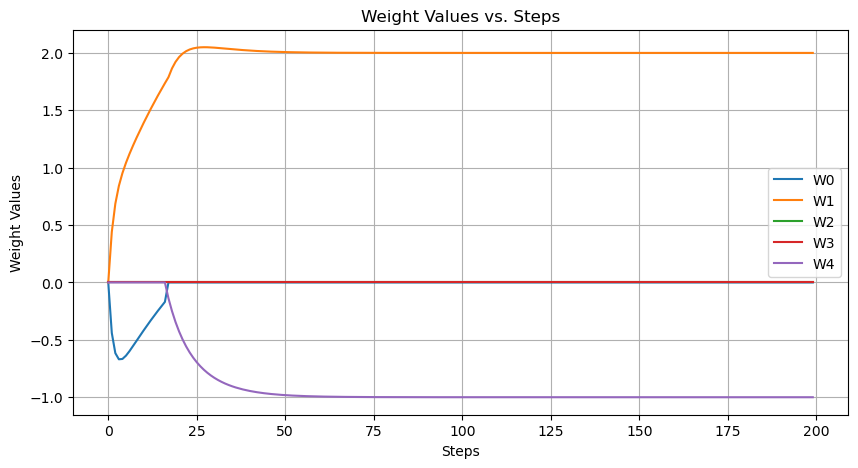

Final Weights: [ 0.  2.  0.  0. -1.]
Final Loss: 7.287920015282167e-18
L0 norm (number of non-zeros): 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights and parameters
W = np.zeros((5, 1))

# Storage for plotting
loss_history = np.zeros(steps)
weight_history = np.zeros((steps, 5))

# Projected gradient descent
for step in range(steps):
    # Compute predictions
    predictions = X @ W
    
    # Compute loss
    loss = np.sum((predictions - y.reshape(-1, 1))**2)
    loss_history[step] = loss
    
    # Store weights
    weight_history[step, :] = W.flatten()
    
    # Compute gradient
    gradient = 2 * X.T @ (predictions - y.reshape(-1, 1))
    
    # Update weights using gradient descent
    W = W - learning_rate * gradient
    
    # Projection step: keep only the 2 largest magnitude weights
    w_flat = W.flatten()
    threshold = np.sort(np.abs(w_flat))[-2]  # Value of 2nd largest weight by magnitude
    mask = np.abs(w_flat) >= threshold
    w_flat = w_flat * mask  # Set smaller weights to zero
    W = w_flat.reshape(-1, 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('log(L) vs. Steps')
plt.xlabel('Steps')
plt.ylabel('log(L)')
plt.yscale('log')  # Use log scale for y-axis
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(weight_history[:, i], label=f'W{i}')
plt.title('Weight Values vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Weight Values')
plt.legend()
plt.grid(True)
plt.show()

print('Final Weights:', W.flatten())
print('Final Loss:', loss_history[-1])
print('L0 norm (number of non-zeros):', np.count_nonzero(W))

Yes W converged to an optimal solution at an early stage and it is converging to a sparse solution.


λ = 0.2:
Final Weights: [-0.42765838  1.40039097 -0.02255693  0.00242927 -1.31989615]
Final Loss: 0.0058527266875182705
L0 norm (number of non-zeros): 5

λ = 0.5:
Final Weights: [-2.58019249e-01  1.60493640e+00 -2.63479728e-03 -1.51292528e-04
 -1.14368882e+00]
Final Loss: 0.02986773123933993
L0 norm (number of non-zeros): 5

λ = 1.0:
Final Weights: [-0.01681012  1.87968662 -0.00459613  0.00962438 -0.89397687]
Final Loss: 0.11239338457424476
L0 norm (number of non-zeros): 5

λ = 2.0:
Final Weights: [-0.06225652  1.83682067  0.02951797  0.00614244 -0.72188959]
Final Loss: 0.4786491507710426
L0 norm (number of non-zeros): 5


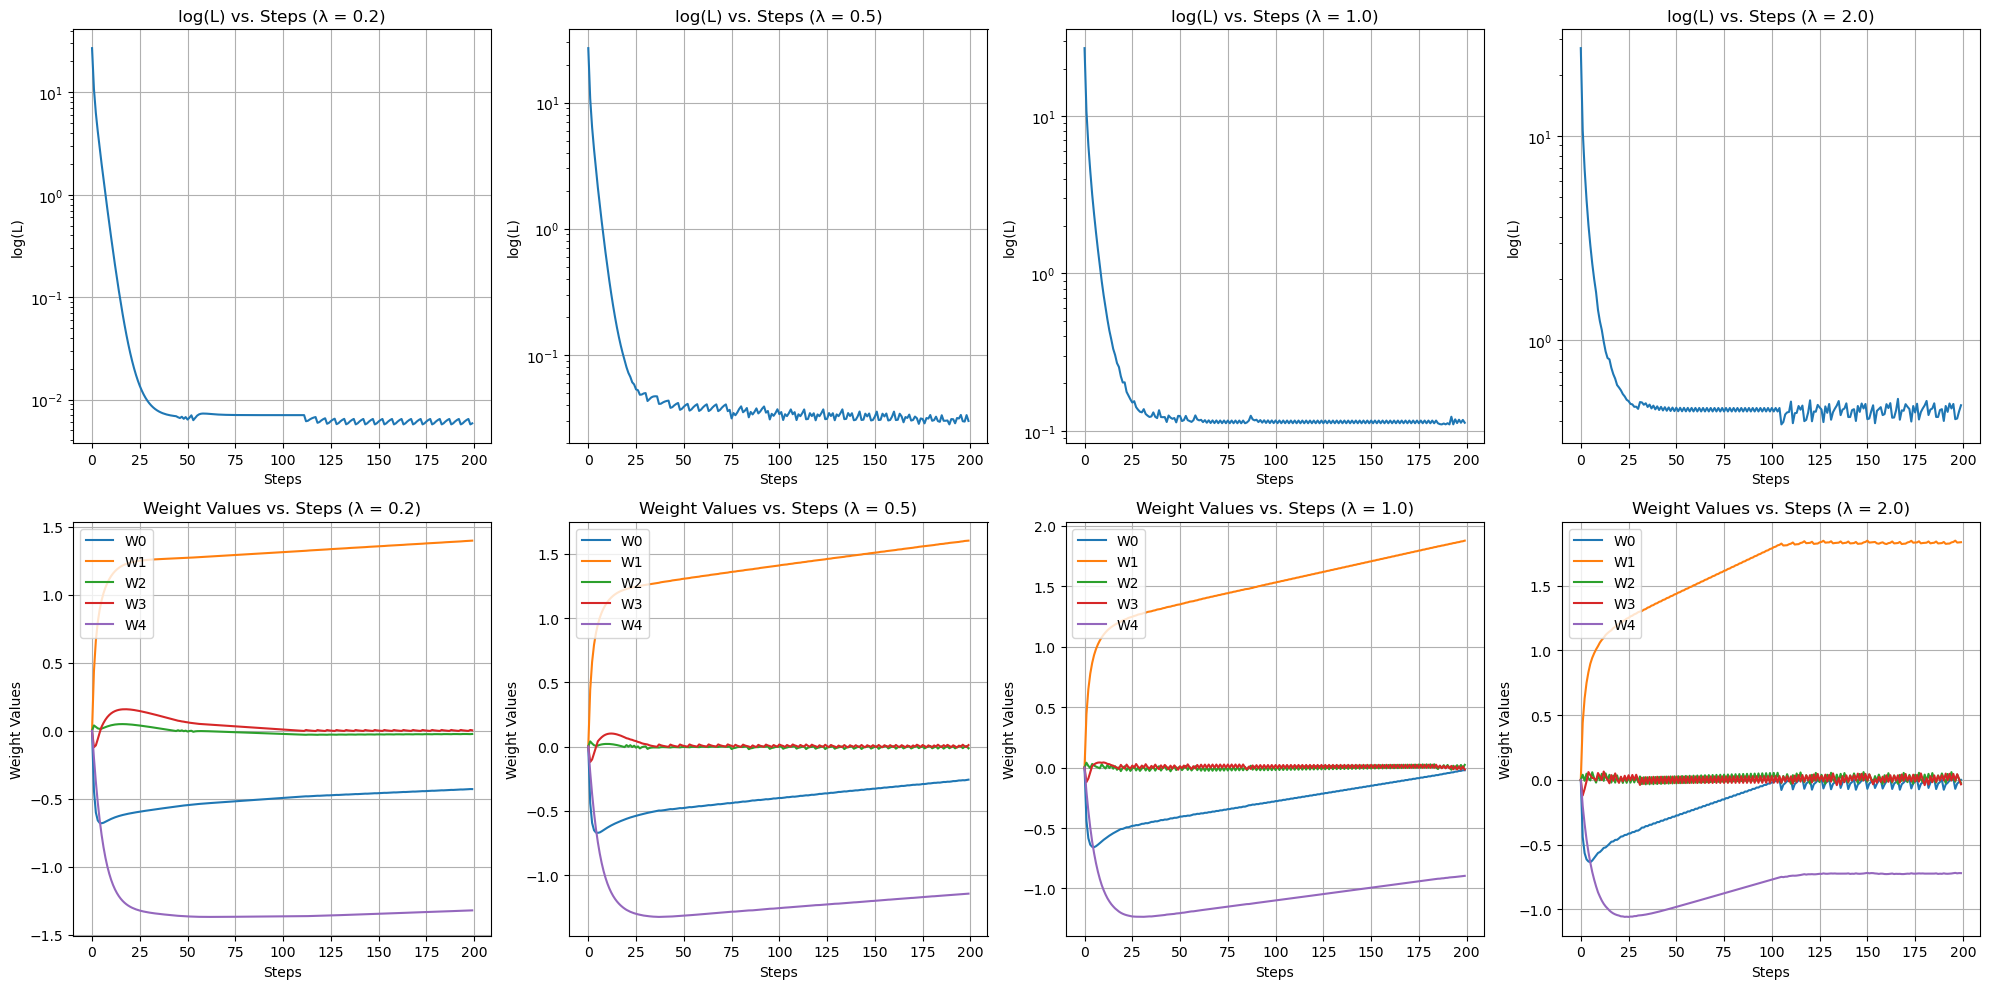

In [3]:
lambda_values = [0.2, 0.5, 1.0, 2.0]

all_loss_histories = []
all_weight_histories = []
final_weights = []

for lambda_val in lambda_values:
    W = np.zeros((5, 1))
    learning_rate = 0.02
    
    loss_history = np.zeros(steps)
    weight_history = np.zeros((steps, 5))
    
    for step in range(steps):

        predictions = X @ W

        loss = np.sum((predictions - y.reshape(-1, 1))**2)
        loss_history[step] = loss

        weight_history[step, :] = W.flatten()
        gradient_loss = 2 * X.T @ (predictions - y.reshape(-1, 1))
        gradient_reg = lambda_val * np.sign(W)
        
        W = W - learning_rate * (gradient_loss + gradient_reg)
    

    all_loss_histories.append(loss_history)
    all_weight_histories.append(weight_history)
    final_weights.append(W.flatten())

    print(f"\nλ = {lambda_val}:")
    print(f"Final Weights: {W.flatten()}")
    print(f"Final Loss: {loss_history[-1]}")
    print(f"L0 norm (number of non-zeros): {np.count_nonzero(W)}")


fig, axes = plt.subplots(2, len(lambda_values), figsize=(20, 10))

for i, lambda_val in enumerate(lambda_values):
    axes[0, i].plot(all_loss_histories[i])
    axes[0, i].set_title(f'log(L) vs. Steps (λ = {lambda_val})')
    axes[0, i].set_xlabel('Steps')
    axes[0, i].set_ylabel('log(L)')
    axes[0, i].set_yscale('log')
    axes[0, i].grid(True)
    

    for j in range(5):
        axes[1, i].plot(all_weight_histories[i][:, j], label=f'W{j}')
    axes[1, i].set_title(f'Weight Values vs. Steps (λ = {lambda_val})')
    axes[1, i].set_xlabel('Steps')
    axes[1, i].set_ylabel('Weight Values')
    axes[1, i].legend()
    axes[1, i].grid(True)

plt.tight_layout()
plt.show()

As we can see from the data and the graph, the larger the lambda the higher the loss, which shows that lambda = 0.2 is the best penalty weight out of these 4.

### Lab1(e)


Threshold = 0.004:
Final Weights: [-0.4254201   1.4011901  -0.02465586  0.         -1.32050089]
Final Loss: 0.006053587055910123
L0 norm (number of non-zeros): 4

Threshold = 0.01:
Final Weights: [-0.24604658  1.61783875 -0.          0.         -1.13556249]
Final Loss: 0.03159331939991172
L0 norm (number of non-zeros): 3

Threshold = 0.02:
Final Weights: [-0.00716772  1.89726958  0.         -0.         -0.88631594]
Final Loss: 0.10815974436644547
L0 norm (number of non-zeros): 3

Threshold = 0.04:
Final Weights: [-0.          1.85714222  0.         -0.         -0.71428725]
Final Loss: 0.42856942692590605
L0 norm (number of non-zeros): 2


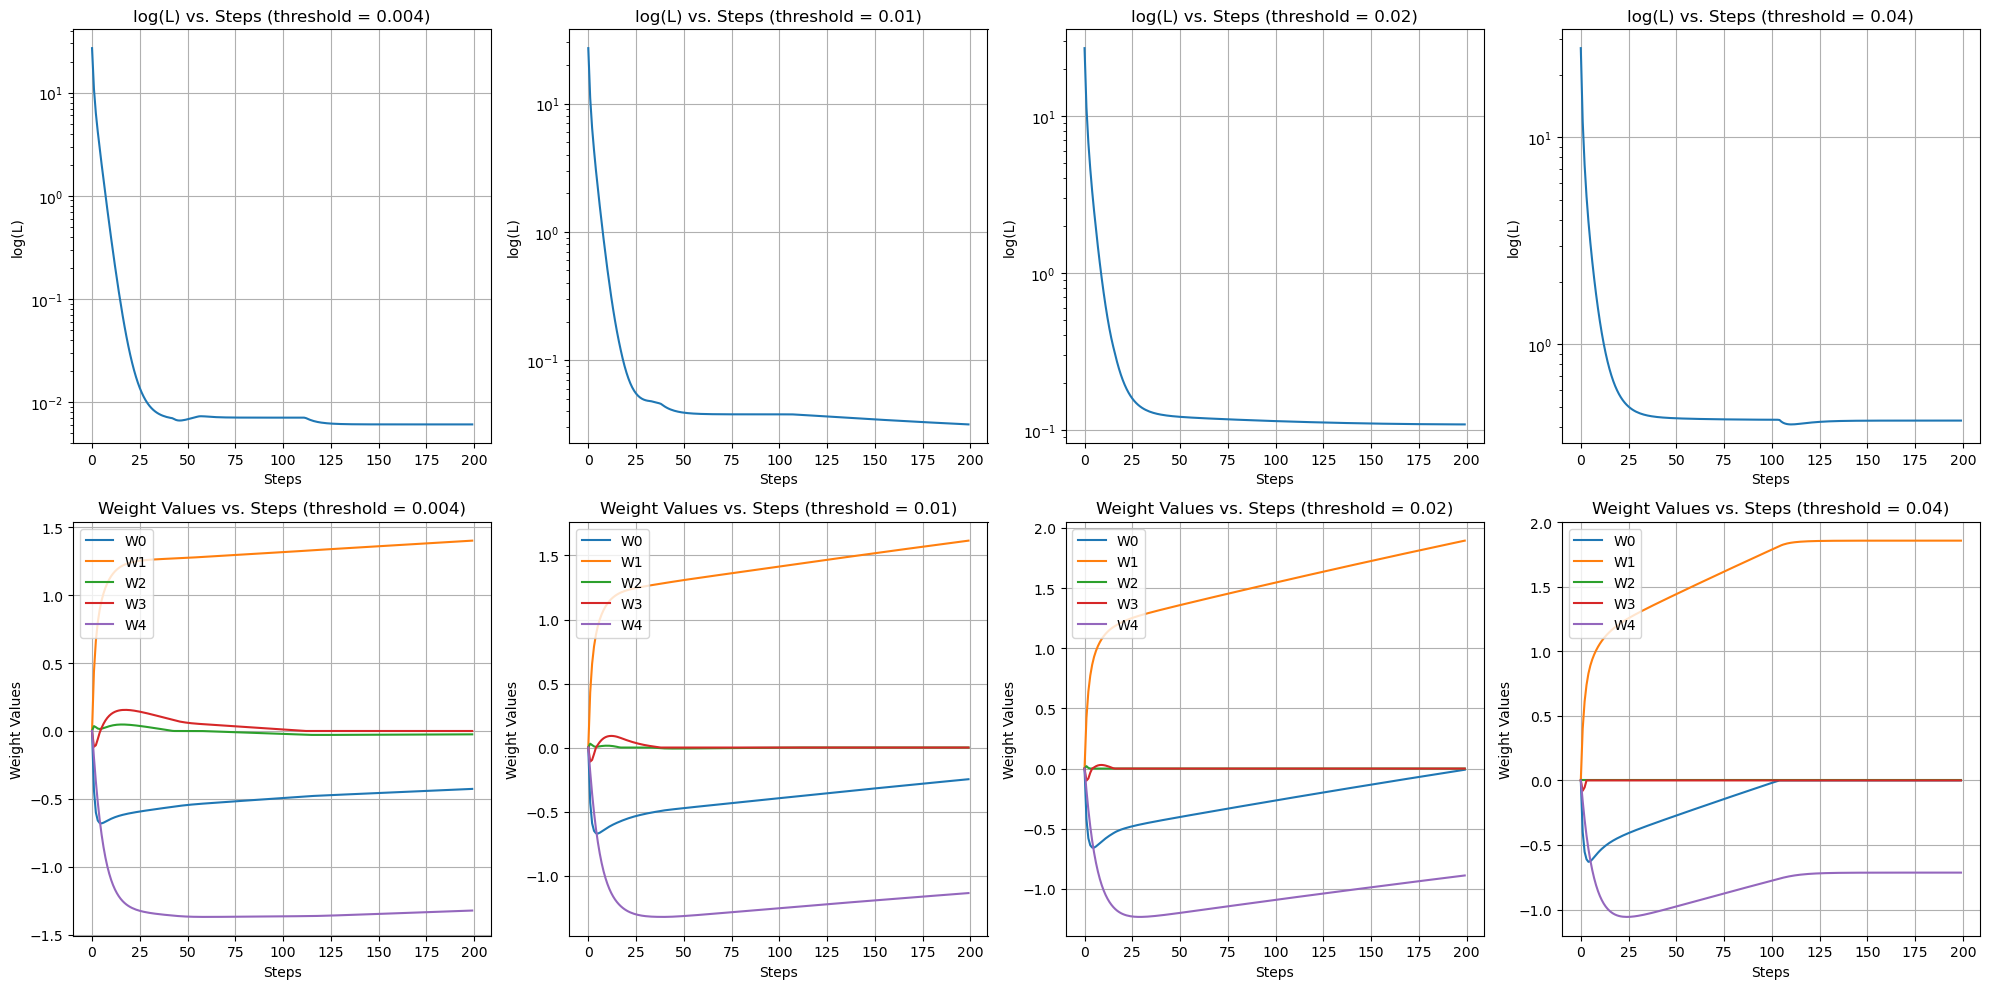

In [4]:

threshold_values = [0.004, 0.01, 0.02, 0.04]

all_loss_histories = []
all_weight_histories = []
final_weights = []

def soft_threshold(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

for threshold in threshold_values:
    W = np.zeros((5, 1))
    learning_rate = 0.02
    
    loss_history = np.zeros(steps)
    weight_history = np.zeros((steps, 5))
    
    for step in range(steps):
        predictions = X @ W

        loss = np.sum((predictions - y.reshape(-1, 1))**2)
        loss_history[step] = loss

        weight_history[step, :] = W.flatten()

        gradient = 2 * X.T @ (predictions - y.reshape(-1, 1))
        W_temp = W - learning_rate * gradient

        W = soft_threshold(W_temp, threshold)
    

    all_loss_histories.append(loss_history)
    all_weight_histories.append(weight_history)
    final_weights.append(W.flatten())
    

    print(f"\nThreshold = {threshold}:")
    print(f"Final Weights: {W.flatten()}")
    print(f"Final Loss: {loss_history[-1]}")
    print(f"L0 norm (number of non-zeros): {np.count_nonzero(W)}")


fig, axes = plt.subplots(2, len(threshold_values), figsize=(20, 10))

for i, threshold in enumerate(threshold_values):

    axes[0, i].plot(all_loss_histories[i])
    axes[0, i].set_title(f'log(L) vs. Steps (threshold = {threshold})')
    axes[0, i].set_xlabel('Steps')
    axes[0, i].set_ylabel('log(L)')
    axes[0, i].set_yscale('log')
    axes[0, i].grid(True)

    for j in range(5):
        axes[1, i].plot(all_weight_histories[i][:, j], label=f'W{j}')
    axes[1, i].set_title(f'Weight Values vs. Steps (threshold = {threshold})')
    axes[1, i].set_xlabel('Steps')
    axes[1, i].set_ylabel('Weight Values')
    axes[1, i].legend()
    axes[1, i].grid(True)

plt.tight_layout()
plt.show()

### Lab1(f)


λ = 1.0, Threshold = 0.02:
Final Weights: [-0.          1.99999987 -0.         -0.         -1.00000033]
Final Loss: 3.9927144809416537e-13
L0 norm (number of non-zeros): 2

λ = 2.0, Threshold = 0.04:
Final Weights: [-0.  2. -0. -0. -1.]
Final Loss: 7.556092971257884e-17
L0 norm (number of non-zeros): 2

λ = 5.0, Threshold = 0.1:
Final Weights: [-0.  2. -0. -0. -1.]
Final Loss: 1.6374572030233797e-19
L0 norm (number of non-zeros): 2

λ = 10.0, Threshold = 0.2:
Final Weights: [ 0.  2.  0.  0. -1.]
Final Loss: 7.287920015282167e-18
L0 norm (number of non-zeros): 2


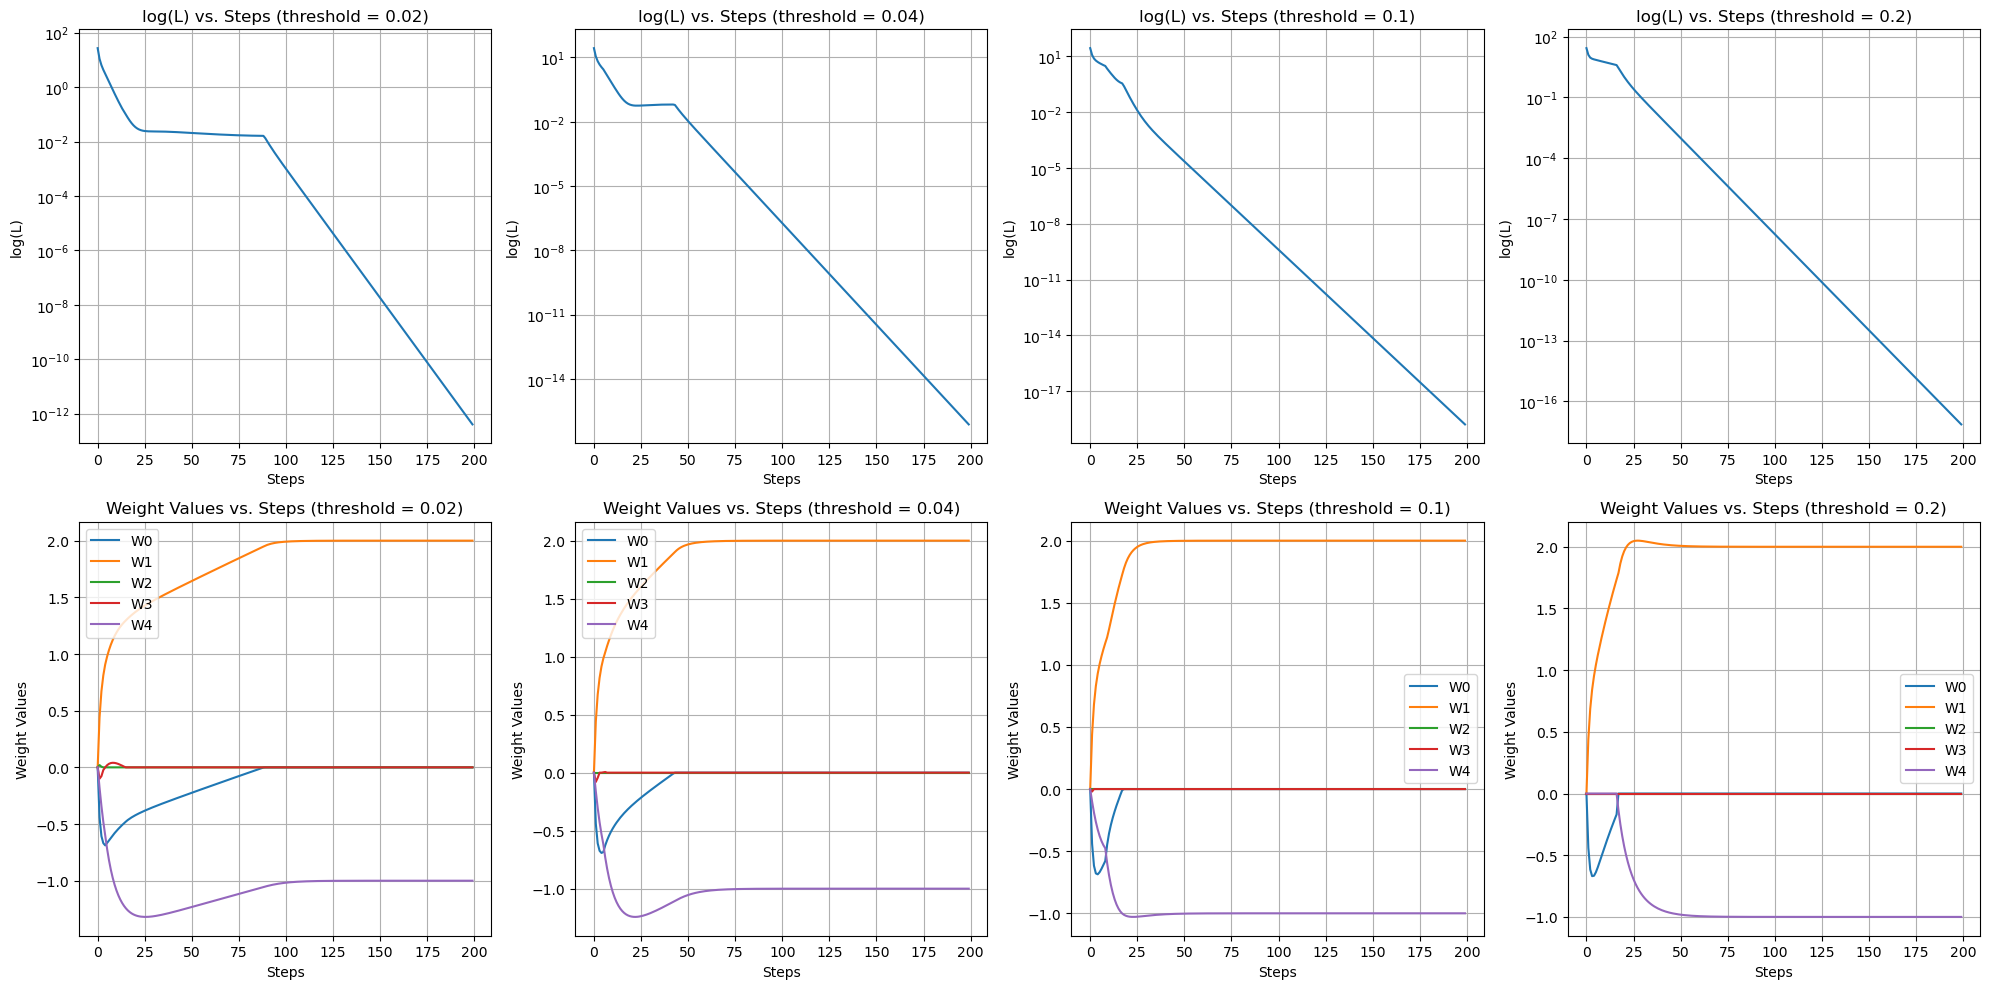

In [5]:
import numpy as np
import matplotlib.pyplot as plt


lambda_values = [1.0, 2.0, 5.0, 10.0]
threshold_values = [0.02, 0.04, 0.1, 0.2]


all_loss_histories = []
all_weight_histories = []
final_weights = []

def trimmed_l1_proximal(w, threshold):
    w_flat = w.flatten()

    indices = np.argsort(np.abs(w_flat))[:3]
    result = w_flat.copy()
    
    mask = np.zeros_like(w_flat, dtype=bool)
    mask[indices] = True
    result[mask] = np.sign(w_flat[mask]) * np.maximum(np.abs(w_flat[mask]) - threshold, 0)
    
    return result.reshape(w.shape)

for i, (lambda_val, threshold) in enumerate(zip(lambda_values, threshold_values)):

    W = np.zeros((5, 1))
    learning_rate = 0.02

    loss_history = np.zeros(steps)
    weight_history = np.zeros((steps, 5))

    for step in range(steps):
        predictions = X @ W
        loss = np.sum((predictions - y.reshape(-1, 1))**2)
        loss_history[step] = loss
        weight_history[step, :] = W.flatten()
        gradient = 2 * X.T @ (predictions - y.reshape(-1, 1))
        W_temp = W - learning_rate * gradient

        W = trimmed_l1_proximal(W_temp, threshold)
    

    all_loss_histories.append(loss_history)
    all_weight_histories.append(weight_history)
    final_weights.append(W.flatten())
    
    print(f"\nλ = {lambda_val}, Threshold = {threshold}:")
    print(f"Final Weights: {W.flatten()}")
    print(f"Final Loss: {loss_history[-1]}")
    print(f"L0 norm (number of non-zeros): {np.count_nonzero(W)}")

fig, axes = plt.subplots(2, len(threshold_values), figsize=(20, 10))

for i, threshold in enumerate(threshold_values):

    axes[0, i].plot(all_loss_histories[i])
    axes[0, i].set_title(f'log(L) vs. Steps (threshold = {threshold})')
    axes[0, i].set_xlabel('Steps')
    axes[0, i].set_ylabel('log(L)')
    axes[0, i].set_yscale('log')
    axes[0, i].grid(True)

    for j in range(5):
        axes[1, i].plot(all_weight_histories[i][:, j], label=f'W{j}')
    axes[1, i].set_title(f'Weight Values vs. Steps (threshold = {threshold})')
    axes[1, i].set_xlabel('Steps')
    axes[1, i].set_ylabel('Weight Values')
    axes[1, i].legend()
    axes[1, i].grid(True)

plt.tight_layout()
plt.show()

As we can see from the graph, the Trimmed L1 clearly shows a faster convergence in both loss and weights, especially in the first 20 steps. The trimmed L1 reached lower loss in the early steps and had faster convergence to the weights than that of l1.